In [235]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

fifa = pd.read_csv('../data/raw/FIFA_players_21.csv')


In [236]:
fifa = fifa.drop(columns=['defending_marking','loaned_from','real_face','nation_jersey_number','nation_position','player_tags','player_traits'])
print(fifa.columns.tolist())

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'release_clause_eur', 'team_position', 'team_jersey_number', 'joined', 'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'me

In [237]:
fifa['release_clause_eur'] = np.where(fifa['release_clause_eur'].isnull,fifa['value_eur']*1.8,fifa['release_clause_eur']) 

fifa['release_clause_eur'].head(180)


0      121500000.0
1       82800000.0
2      135000000.0
3      144000000.0
4      162000000.0
          ...     
175     21600000.0
176     44100000.0
177     28800000.0
178     36000000.0
179     35100000.0
Name: release_clause_eur, Length: 180, dtype: float64

In [238]:
fifa['release_clause_eur']=np.log1p(fifa['release_clause_eur']).round(5)
fifa['release_clause_eur'].tail()

18939    11.18444
18940    11.05091
18941    11.05091
18942    11.18444
18943    10.89676
Name: release_clause_eur, dtype: float64

In [239]:
fifa['value_eur'] = np.log1p(fifa['value_eur']).round(5)
fifa=fifa[fifa['value_eur'] != 0]
fifa['value_eur'].head(900)

0      18.02764
1      17.64415
2      18.13300
3      18.19754
4      18.31532
         ...   
916    16.38046
917    16.25786
918    16.34124
919    16.34124
920    16.25786
Name: value_eur, Length: 900, dtype: float64

In [240]:
fifa['dob'] = pd.to_datetime(fifa['dob'], format='%m/%d/%Y', errors='coerce')
fifa['joined'] = pd.to_datetime(fifa['joined'], format='%m/%d/%Y', errors='coerce')


fifa['joined'].head(390)



0     2004-07-01
1     2018-07-10
2     2014-07-16
3     2014-07-01
4     2017-08-03
         ...    
387   2017-01-31
388   2018-08-09
389   2019-07-01
390   2019-07-05
391   2018-07-01
Name: joined, Length: 390, dtype: datetime64[ns]

In [241]:
fifa_GK=fifa[fifa['player_positions'] == 'GK'].copy()
fifa_OUT=fifa[fifa['player_positions'] != 'GK'].copy()

fifa_GK=fifa_GK.drop(columns=['pace','shooting','passing','dribbling','defending','physic'],axis=1)
fifa_OUT=fifa_OUT.drop(columns=['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'],axis=1)


In [242]:
types_summary=pd.DataFrame({
    "Colana" : fifa.columns,
    "Types" : fifa.dtypes.values,
    "Nr_unique_values": fifa.nunique().values,
    'Missing_values':fifa.isnull().sum()
})


gk_types_summary=pd.DataFrame({
    "Colana" : fifa_GK.columns,
    "Types" : fifa_GK.dtypes.values,
    "Nr_unique_values": fifa_GK.nunique().values,
    'Missing_values':fifa_GK.isnull().sum()
})


out_types_summary=pd.DataFrame({
    "Colana" : fifa_OUT.columns,
    "Types" : fifa_OUT.dtypes.values,
    "Nr_unique_values": fifa_OUT.nunique().values,
    'Missing_values':fifa_OUT.isnull().sum()
})

print(types_summary)
print(gk_types_summary)
print(out_types_summary)

types_summary.to_csv("C:/Users/Lukas/Desktop/CVT_Data_Set/fifa_summary.csv", index=False)
gk_types_summary.to_csv("C:/Users/Lukas/Desktop/CVT_Data_Set/fifa_GK_summary.csv", index=False)
out_types_summary.to_csv("C:/Users/Lukas/Desktop/CVT_Data_Set/fifa_OUT_summary.csv", index=False)
fifa_OUT.to_csv("C:/Users/Lukas/Desktop/CVT_Data_Set/Out_summary.csv", index=False)
fifa_GK.to_csv("C:/Users/Lukas/Desktop/CVT_Data_Set/GK_summary.csv", index=False)

                Colana   Types  Nr_unique_values  Missing_values
sofifa_id    sofifa_id   int64             18707               0
player_url  player_url  object             18707               0
short_name  short_name  object             17664               0
long_name    long_name  object             18660               0
age                age   int64                28               0
...                ...     ...               ...             ...
lb                  lb  object               195               0
lcb                lcb  object               222               0
cb                  cb  object               222               0
rcb                rcb  object               222               0
rb                  rb  object               195               0

[99 rows x 4 columns]
                Colana   Types  Nr_unique_values  Missing_values
sofifa_id    sofifa_id   int64              2053               0
player_url  player_url  object              2053               0
sh

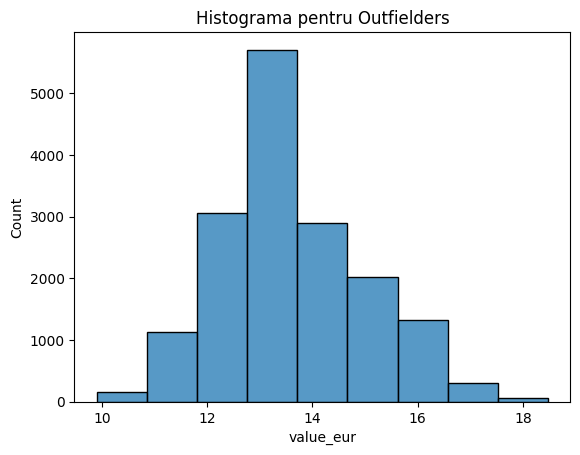

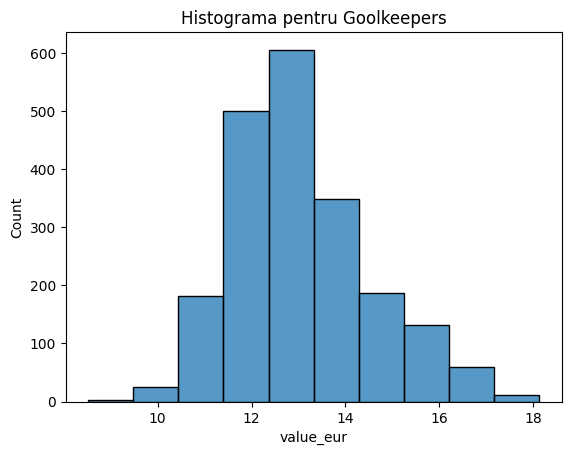

In [243]:
sns.histplot(data=fifa_OUT ,x='value_eur',binwidth=1)
plt.title("Histograma pentru Outfielders")
plt.show()
sns.histplot(data=fifa_GK ,x='value_eur',binwidth=1,)
plt.title("Histograma pentru Goolkeepers")
plt.show()

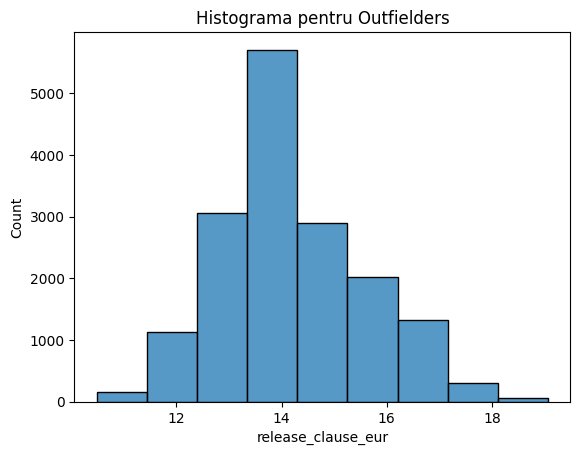

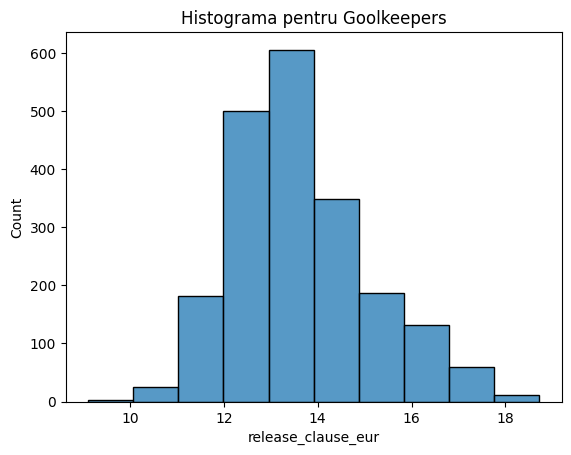

In [244]:
sns.histplot(data=fifa_OUT ,x='release_clause_eur',binwidth=1)
plt.title("Histograma pentru Outfielders")
plt.show()
sns.histplot(data=fifa_GK ,x='release_clause_eur',binwidth=1)
plt.title("Histograma pentru Goolkeepers")
plt.show()

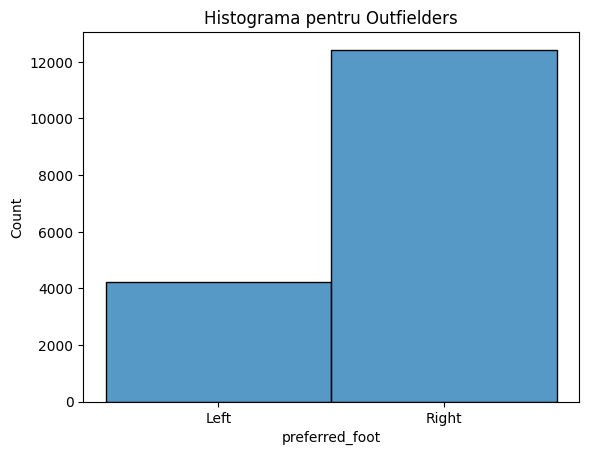

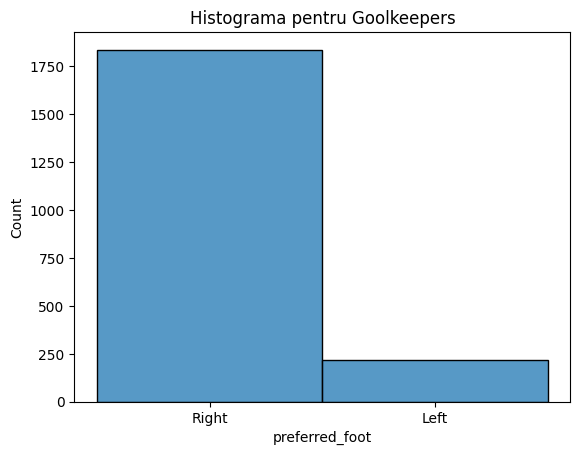

In [245]:
sns.histplot(data=fifa_OUT ,x='preferred_foot',binwidth=1)
plt.title("Histograma pentru Outfielders")
plt.show()
sns.histplot(data=fifa_GK ,x='preferred_foot',binwidth=1)
plt.title("Histograma pentru Goolkeepers")
plt.show()

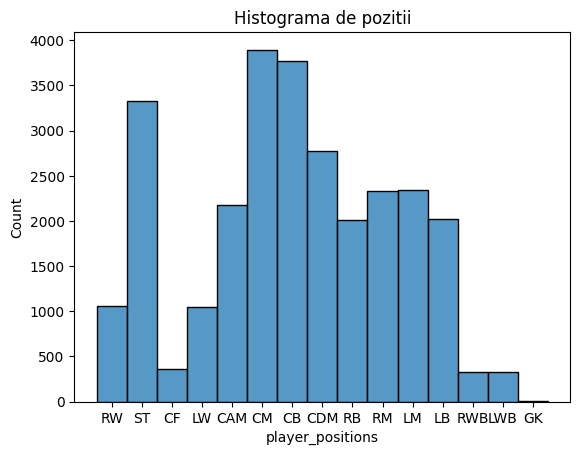

In [246]:



all_positions = fifa_OUT['player_positions'].str.split(', ').explode()


sns.histplot(all_positions, discrete=True)
plt.title("Histograma de pozitii")
plt.show()
